In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering





In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


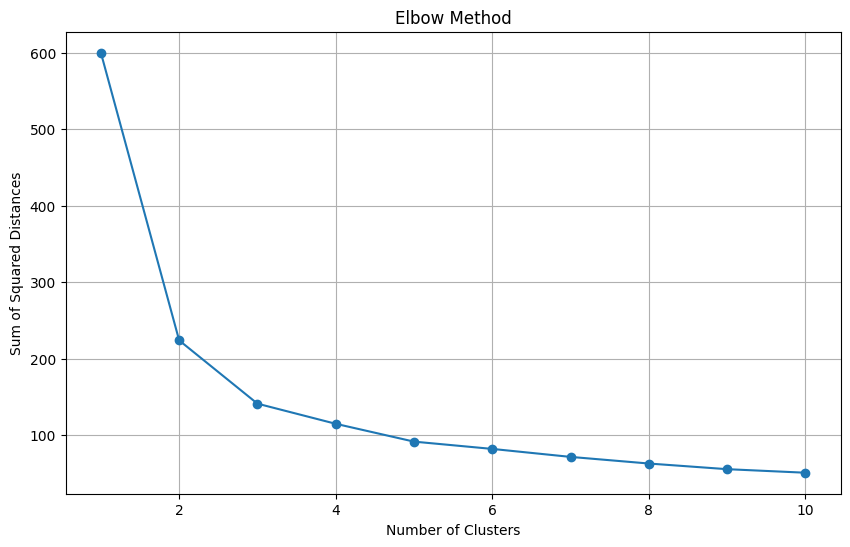

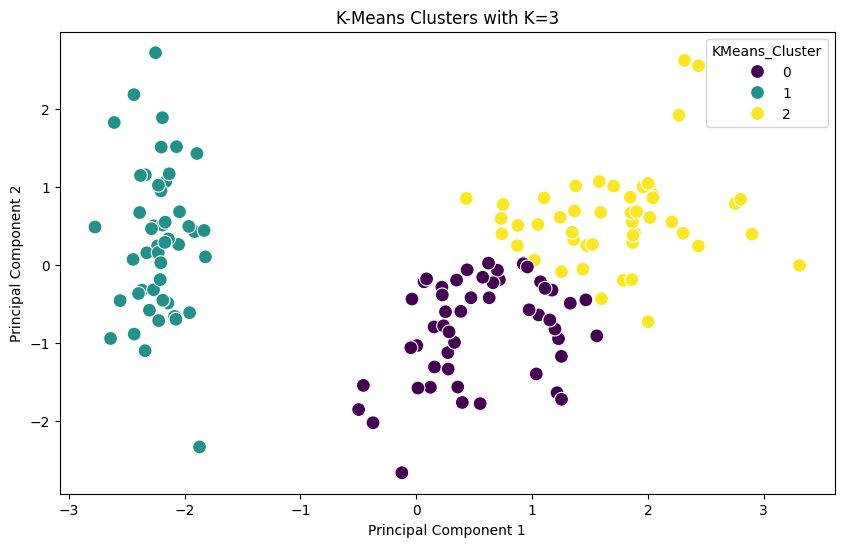

In [ ]:
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

ssd = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_model.fit(scaled_features)
    ssd.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
iris_data = df.copy()
iris_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
iris_data['PC1'] = principal_components[:, 0]
iris_data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=iris_data, palette='viridis', s=100)
plt.title(f'K-Means Clusters with K={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

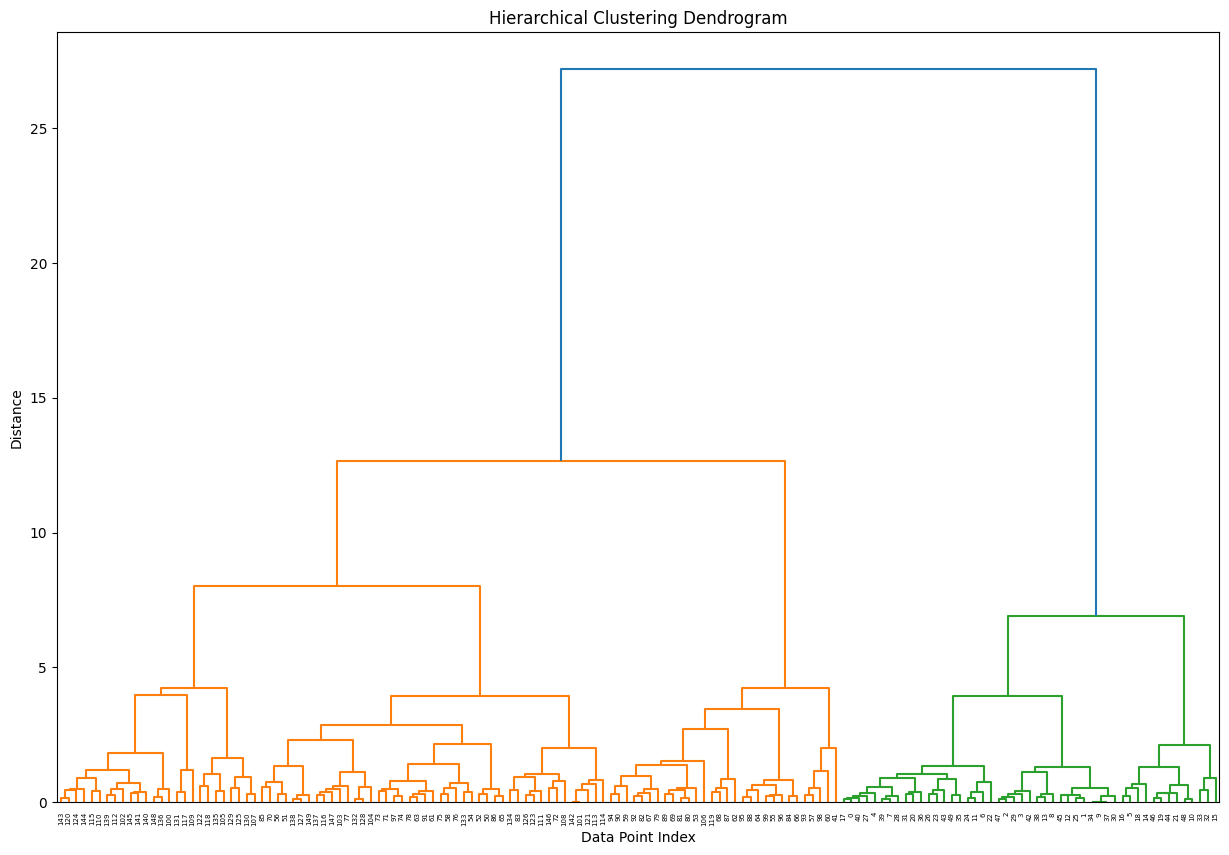

In [ ]:
linked_data = linkage(scaled_features, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked_data,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()